<h3>16. Write a Program to implement Naive Bayes with binary class label using diabetes dataset.</h3>


#### Algorithm steps:

1.	Let’s consider that we have a binary classification problem i.e., we have two classes in our data as shown below.
<img src=fig1.PNG width=300>
2.	Now suppose if we are given with a new data point, to which class does that point belong to?
<img src=fig2.PNG width=300>
3.	The formula for a point ‘X’ to belong in class1 can be written as:
<img src=fig3.PNG width=300>
Where the numbers represent the order in which we are going to calculate different probabilities.
4.	A similar formula can be utilised for class 2 as well.
5.	Probability of class 1 can be written as:
$P(class1)=\frac{Number of points in class1}{Total number of points}= \frac {16}{26}=0.62$
6.	For calculating the probability of X, we draw a circle around the new point and see how many points(excluding the new point) lie inside that circle.
<img src=fig4.PNG width=300>

The points inside the circle are considered to be similar points. 
$P(X)=\frac{Number of similar observation}{Total Observations}=\frac {3}{26}=0.12$
7.	Now, we need to calculate the probability of a point to be in the circle that we have made given that it’s of class 1.
$P(X | Class1)= \frac {Number of points in class 1 inside the circle}{Total number of points in class 1}=\frac{1}{16}=0.06$
8.	We can substitute all the values into the formula in step 3. We get:
$P(Class1 | X)=\frac{0.06*0.62}{0.12}=0.31$
9.	And if we calculate the probability that X belongs to Class2, we’ll get 0.69. It means that our point belongs to class 2.


##### The Generalization for Multiclass:

The approach discussed above can be generalised for multiclass problems as well. 
Suppose, P1, P2, P3…Pn are the probabilities for the classes C1,C2,C3…Cn, then the point X will belong to the class for which the probability is maximum. Or mathematically the point belongs to the result of : $ argmax(P1,P2,P3….Pn)$


##### The Difference
You can notice a major difference in the way in which the Naïve Bayes algorithm works form other classification algorithms. It does not first try to learn how to classify the points. It directly uses the label to identify the two separate classes and then it predicts the class  to which the new point shall belong.

##### Why it is called Naïve Bayes?
The entire algorithm is based on Bayes’s theorem to calculate probability. So, it also carries forward the assumptions for the Bayes’s theorem. But those assumptions(that the features are independent) might not always be true when implemented over a real-world dataset. So, those assumptions are considered _Naïve_ and hence the name.


#### Python Implementation

In [4]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [7]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [8]:
# Handling the Outliers

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

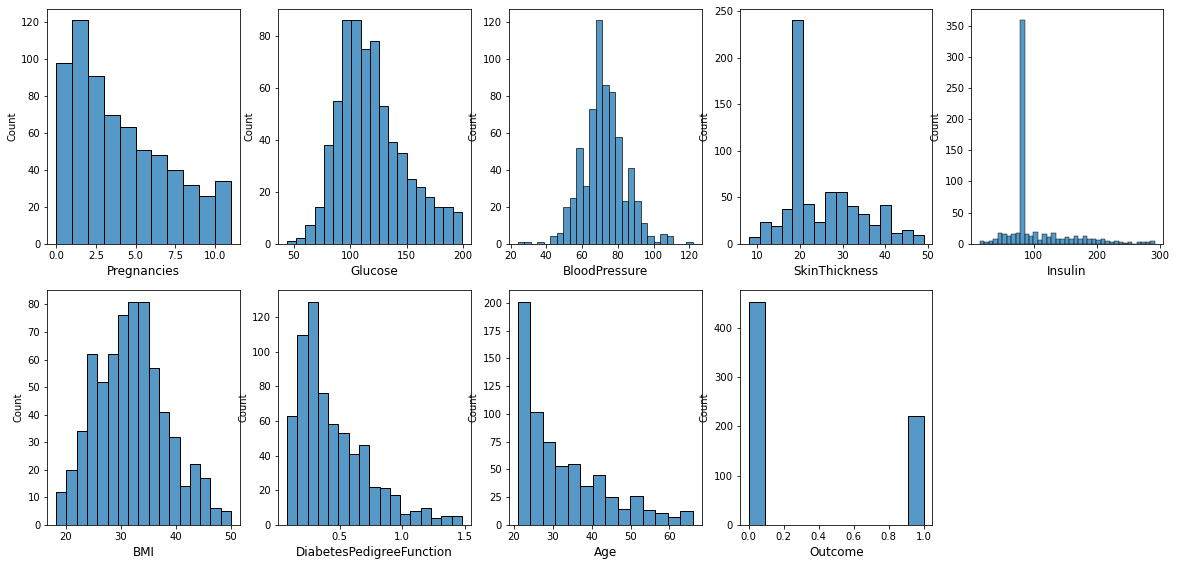

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(5,5,plotnumber)
        sns.histplot(data_cleaned[column])
        plt.xlabel(column,fontsize=12)
        #plt.ylabel('Salary',fontsize=12)
    plotnumber+=1
plt.show()

In [11]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [12]:
# we need to scale our data as well

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [13]:
# This is how our data looks now after scaling.
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [14]:
# now we will check for multicollinearity using VIF(Variance Inflation factor)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [17]:
model.fit(x_train,y_train)

GaussianNB()

In [18]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [19]:
y_pred = model.predict(x_test)

In [20]:
print(accuracy_score(y_test, y_pred))

0.7864583333333334


In [21]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [22]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [23]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7864583333333334

In [24]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.872

In [25]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8134328358208955

In [26]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8416988416988417

In [27]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7494328358208956

So far we have been doing  grid search to maximise the accuracy of our model.
 Here, we’ll follow a different approach. We’ll create two models, one with Logistic regression and other with Naïve Bayes and we’ll compare the AUC. The algorithm having a better AUC shall be considered for production deployment.


In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

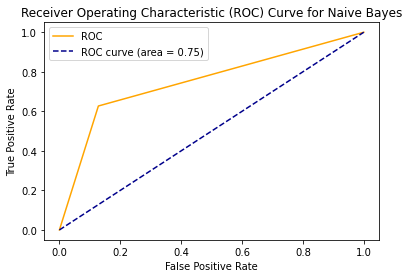

In [29]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

**Advantages:**

* Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.
* Naive Bayes provides a direct probabilistic prediction.
* Naive Bayes is often easy to interpret.
* Naive Bayes has fewer (if any) parameters to tune


**Disadvantages:**

* The algorithm assumes that the features are independent which is not always the scenario
* Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a zero probability to that category and then a prediction cannot be made.

